<a href="https://colab.research.google.com/github/SkyRanger2010/DE2025_DSS/blob/main/DE2025_DSS__HW6_%D0%A1%D0%B0%D1%82%D0%B0%D0%BD%D1%86%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv')
display(df.head())

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [18]:
data_columns = list(df.columns)
num_columns = df.select_dtypes(include='number').columns
str_columns = df.select_dtypes(include='object').columns

In [19]:
data_columns

['sale_id',
 'branch',
 'city',
 'customer_type',
 'gender',
 'product_name',
 'product_category',
 'unit_price',
 'quantity',
 'tax',
 'total_price',
 'reward_points']

In [21]:
num_columns

Index(['sale_id', 'unit_price', 'quantity', 'tax', 'total_price',
       'reward_points'],
      dtype='object')

In [22]:
str_columns

Index(['branch', 'city', 'customer_type', 'gender', 'product_name',
       'product_category'],
      dtype='object')

In [25]:
columns_count = len(data_columns)
columns_count

12

In [26]:
lines_count = df.shape[0]
lines_count

1000

In [27]:
converted_data = df.convert_dtypes()

In [28]:
converted_data_sample = converted_data.head()
transposed_data_samle = converted_data_sample.transpose()
transposed_data_samle

,0,1,2,3,4
sale_id,1,2,3,4,5
branch,A,B,A,A,B
city,New York,Los Angeles,New York,Chicago,Los Angeles
customer_type,Member,Normal,Member,Normal,Member
gender,Male,Female,Female,Male,Female
product_name,Shampoo,Notebook,Apple,Detergent,Orange Juice
product_category,Personal Care,Stationery,Fruits,Household,Beverages
unit_price,5.5,2.75,1.2,7.8,3.5
quantity,3,10,15,5,7
tax,1.16,1.93,1.26,2.73,1.72


In [29]:
converted_data.value_counts('city')

,count
city,
New York,344
Chicago,330
Los Angeles,326


In [30]:
converted_data.value_counts('customer_type')

,count
customer_type,
Member,516
Normal,484


In [31]:
converted_data.value_counts('gender')

,count
gender,
Male,528
Female,472


In [32]:
converted_data.value_counts('branch')

,count
branch,
A,674
B,326


In [33]:
converted_data.value_counts('product_name')

,count
product_name,
Shampoo,224
Orange Juice,208
Notebook,194
Detergent,189
Apple,185


In [34]:
converted_data.value_counts('product_category')

,count
product_category,
Fruits,209
Personal Care,208
Household,198
Stationery,198
Beverages,187


In [35]:
print(converted_data['unit_price'].min())
print(converted_data['unit_price'].max())

1.02
20.98


In [37]:
print(converted_data['quantity'].min())
print(converted_data['quantity'].max())

1
20


In [38]:
print(converted_data['tax'].min())
print(converted_data['tax'].max())

0.08
28.39


In [39]:
print(sum(converted_data['unit_price'] * converted_data['quantity'] + converted_data['tax']))

118583.90000000005


In [40]:
print(converted_data['total_price'].sum())

118583.9


In [47]:
print("%-30s\tCount\tCount\t Count\tCount" % "Column")
print("                                        distinct null\tnot null")
for col in data_columns:
  count = df[col].count()
  count_dist = len(pd.unique(df[col]))
  count_null = len(df[df[col].isnull()])
  count_not_null = len(df[df[col].notnull()])
  print("%-30s\t%6d\t%6d\t%6d\t%6d" % (col, count , count_dist, count_null, count_not_null))

Column                        	Count	Count	 Count	Count
                                        distinct null	not null
sale_id                       	  1000	  1000	     0	  1000
branch                        	  1000	     2	     0	  1000
city                          	  1000	     3	     0	  1000
customer_type                 	  1000	     2	     0	  1000
gender                        	  1000	     2	     0	  1000
product_name                  	  1000	     5	     0	  1000
product_category              	  1000	     5	     0	  1000
unit_price                    	  1000	   787	     0	  1000
quantity                      	  1000	    20	     0	  1000
tax                           	  1000	   755	     0	  1000
total_price                   	  1000	   956	     0	  1000
reward_points                 	  1000	    43	     0	  1000


In [41]:
df[str_columns].describe()

,branch,city,customer_type,gender,product_name,product_category
count,1000,1000,1000,1000,1000,1000
unique,2,3,2,2,5,5
top,A,New York,Member,Male,Shampoo,Fruits
freq,674,344,516,528,224,209


In [43]:
print("%25s\t Max\t Min\t Avg" % "Column")
for col in str_columns:
  string_lengths = converted_data[col].str.len()
  avg_length = string_lengths.mean()
  max_length = string_lengths.max()
  min_length = string_lengths.min()
  print("{:25s}\t{:6.2f}\t{:6.2f}\t{:6.2f}".format(col,max_length,min_length,avg_length))

                   Column	 Max	 Min	 Avg
branch                   	  1.00	  1.00	  1.00
city                     	 11.00	  7.00	  8.65
customer_type            	  6.00	  6.00	  6.00
gender                   	  6.00	  4.00	  4.94
product_name             	 12.00	  5.00	  8.24
product_category         	 13.00	  6.00	  9.40


In [48]:
df.describe()

,sale_id,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,15.882500,16.000000,11.522500,176.072500,10.000000
max,1000.000000,20.980000,20.000000,28.390000,433.990000,43.000000


In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
sorted_data = (df.sort_values(by='product_name'))['quantity']
split_index = len(sorted_data) // 2
reference = sorted_data.iloc[:split_index]
monitored = sorted_data.iloc[split_index:]
full_dataset = np.concatenate((reference, monitored))
_, bin_edges = np.histogram(full_dataset, bins="doane")
reference_hist, _ = np.histogram(reference, bins=bin_edges)
monitored_hist, _ = np.histogram(monitored, bins=bin_edges)
reference_proportions = reference_hist / np.sum(reference_hist)
monitored_proportions = monitored_hist / np.sum(monitored_hist)
monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)
reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)
psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions /
reference_proportions)
psi = np.sum(psi_values)
psi

np.float64(0.055443201550503404)

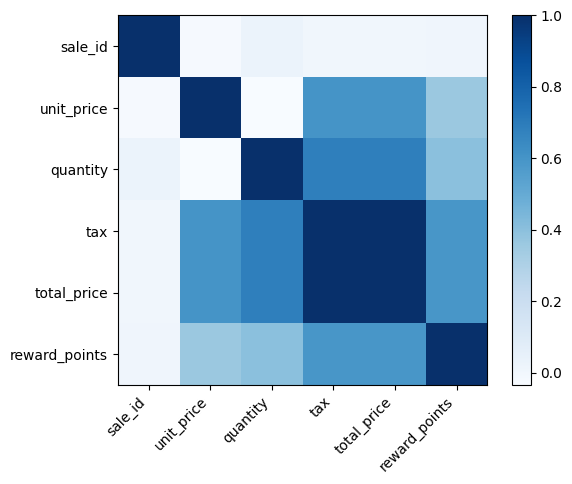

In [53]:
matrix = converted_data[num_columns].corr()
plt.imshow(matrix, cmap='Blues')
plt.colorbar()
variables = []
for i in matrix.columns:
  variables.append(i)
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)
plt.show()

In [54]:
topX = 5
for col in num_columns:
  print("{:25s}\t".format(col),list(df[col].nlargest(n=topX)))

sale_id                  	 [1000, 999, 998, 997, 996]
unit_price               	 [20.98, 20.96, 20.96, 20.92, 20.91]
quantity                 	 [20, 20, 20, 20, 20]
tax                      	 [28.39, 27.94, 27.81, 27.68, 27.58]
total_price              	 [433.99, 427.14, 425.1, 423.08, 421.64]
reward_points            	 [43, 42, 41, 41, 40]


array([[<Axes: title={'center': 'sale_id'}>,
        <Axes: title={'center': 'unit_price'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'reward_points'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

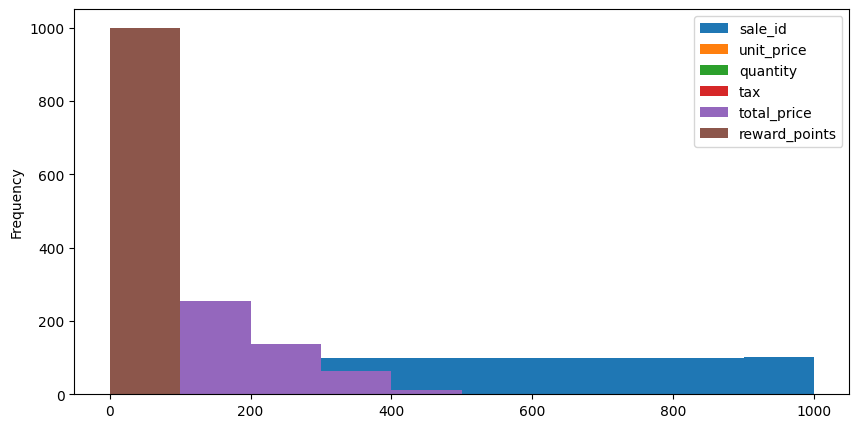

<Figure size 640x480 with 0 Axes>

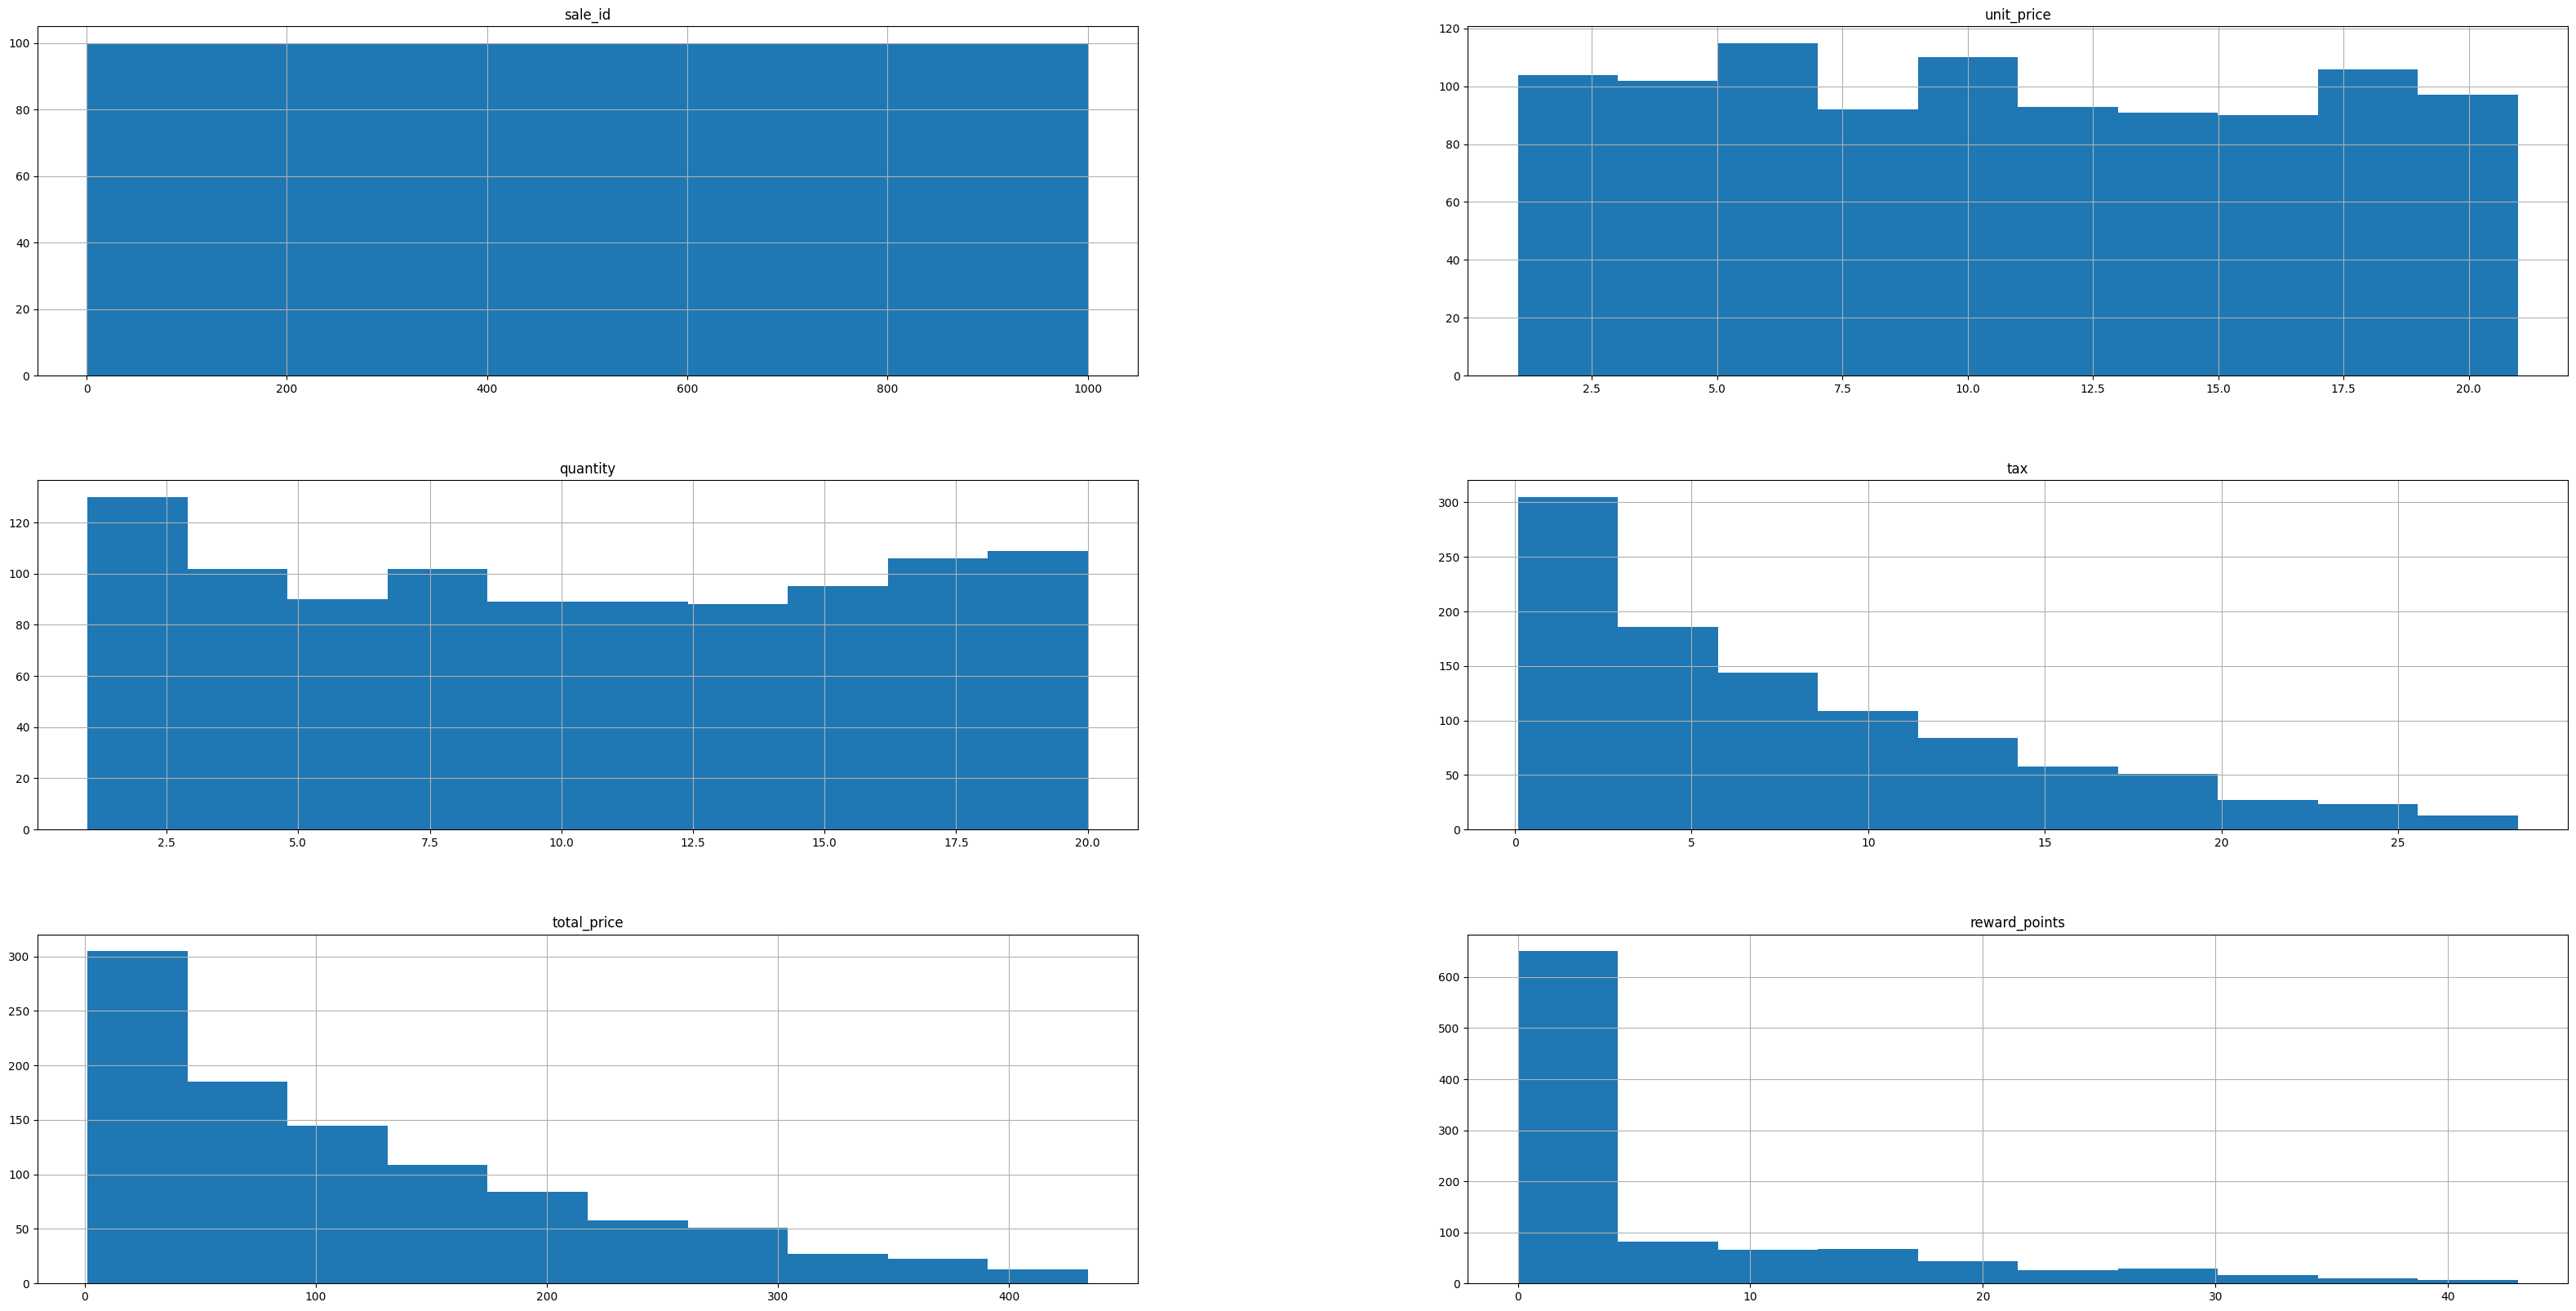

In [55]:
plt.figure()
converted_data.plot.hist(figsize=(10, 5))
plt.figure()
converted_data.hist(figsize=(40, 20))